In [1]:
# Libraries
from collections import Counter;
from sklearn.metrics import accuracy_score
from sklearn import tree;
import pandas as pd;
import numpy as np;
import os;
print('OK');

OK


In [2]:
# Getting the dataset
df_train = pd.read_csv('/kaggle/input/titanic/train.csv'); # Training data: 0 => 549 Deceased, 1 => 342 Survived
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
# where we have masculine and feminine, we change it to 0 and 1, respectively
# where we have the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton), we change it to 0, 1, 2 respectively
df_train = df_train.replace(to_replace = "male", value = 0);
df_train = df_train.replace(to_replace = "female", value = 1);
df_train = df_train.replace(to_replace = "C", value = 0);
df_train = df_train.replace(to_replace = "Q", value = 1);
df_train = df_train.replace(to_replace = "S", value = 2);
df_train = df_train.fillna(0, inplace = False); # Replace the NaN values in the dataframe

df_test = df_test.replace(to_replace = "male", value = 0);
df_test = df_test.replace(to_replace = "female", value = 1);
df_test = df_test.replace(to_replace = "C", value = 0);
df_test = df_test.replace(to_replace = "Q", value = 1);
df_test = df_test.replace(to_replace = "S", value = 2);
df_test = df_test.fillna(0, inplace = False); # Replace the NaN values in the dataframe

Y_train = df_train['Survived']; # we save the column that informs if the passenger survived or not
X_train = df_train.drop(columns = ['Survived', 'Name','Ticket', 'Cabin']); # we removed the column of names, the cabin, the ticket identification and whether or not it survived
X_test = df_test.drop(columns = ['Name','Ticket', 'Cabin']);
print('OK');

OK


In [ ]:
# TODO: Verify Later
#booths = X['Cabin'].unique();
#booths = booths.tolist();
#for element in X['Cabin']:
    #print(element)
    #index = booths.index(element);
    #if(index == -1):
        #index = 0;
    #X['Cabin'][element] = index;
#print(booths.index('C85'))

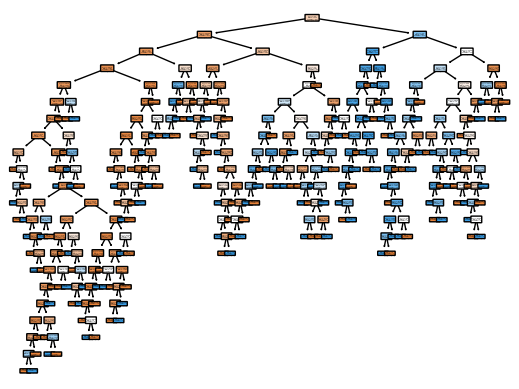

In [3]:
# Plotting the decision tree, and making the prediction
clf = tree.DecisionTreeClassifier();
clf = clf.fit(X_train, Y_train);
tree.plot_tree(clf, filled = True, rounded = True)
predict = clf.predict(X_test)

In [4]:
# Actively our dataframe for challenge response
nwdf = X_test.drop(columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']);
nwdf['Survived'] = predict
print(nwdf.columns)

Index(['PassengerId', 'Survived'], dtype='object')


In [5]:
# Returning to a .csv file
nwdf.to_csv('response.csv', index = False);
print('OK')